### Machine Learning BDA 500
### Anna
### Assignment 2


# Task 1: Support Vector Machine, regularization, and hyperparameter optimization
### IRIS datast

## Task 1-1: Frame the problem:

    

## Task 1-2: Importing relevant libraries

In [29]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Task 1-3: Importing the IRIS dataset

In [18]:
# commenting the relavant library for my own record
# from sklearn.datasets import load_iris
iris_dataset = load_iris()
# creating a dataframe
iris_dataframe = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
# indicating the target column
iris_dataframe['target'] = iris_dataset.target

## Task 1-4: Take a quick look at the data structure

In [19]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Explanation:
    This table has a column called "target" with numbers that stand for different types of flowers. For example, 0 means "setosa," 1 means "versicolor," and 2 means "virginica."


In [20]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Explanation:
    This dataset has 5 columns, all columns are numeric, the four independent columns are float type, and the target (dependent) column is integer type. Also this dataset has 150 rows.

In [21]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Explanation:
    With describe() we get the statistics summary of nemeric columns of this dataset, as you can see in above. 

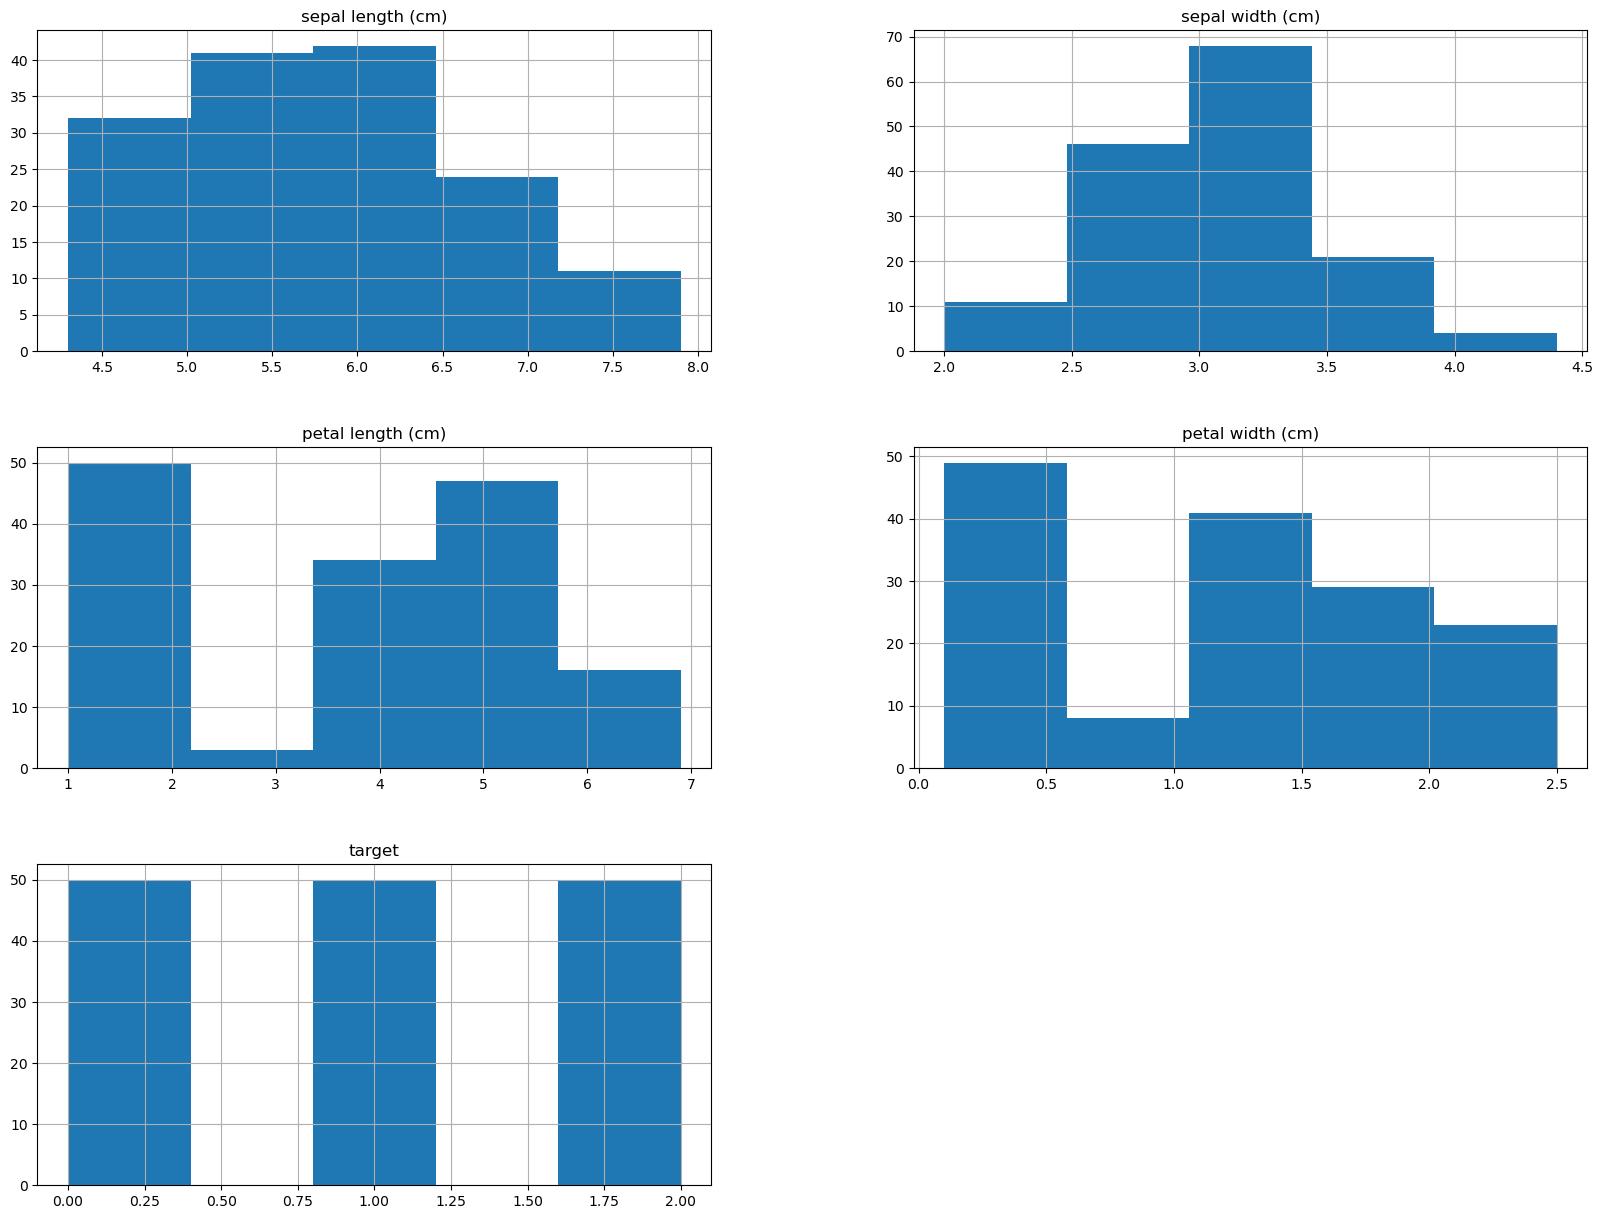

In [22]:
# Plotting histograms for numerical columns
iris_dataframe.hist(bins=5, figsize=(20, 15))
plt.show()

### Explanation:
    Based on above histograms we can see that our target values has a balanced distributions between all different types of flowers. In two columns (sepal length (cm)) and (sepal width (cm)) we have a normal bell-shaped distribution. In two other columns (petal length (cm)) and (petal width (cm)) we see two peaks so this two columns are not normal bell shaped distribution. 

## Task 1-5: train test split

In [24]:
X = iris_dataset.data
y = iris_dataset.target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Task 1-6: Standardizaion

In [27]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Task 1-7: LinearSVC

In [30]:
# Initialize and train LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Predict using LinearSVC
linear_svc_pred = linear_svc.predict(X_test)

# Evaluate LinearSVC
linear_svc_accuracy = accuracy_score(y_test, linear_svc_pred)
print("LinearSVC Accuracy:", linear_svc_accuracy)
print("Classification Report:")
print(classification_report(y_test, linear_svc_pred))


LinearSVC Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Task 1-8: SVC with Linear Kernel

In [31]:
# Initialize and train SVC with linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Predict using SVC with linear kernel
svc_linear_pred = svc_linear.predict(X_test)

# Evaluate SVC with linear kernel
svc_linear_accuracy = accuracy_score(y_test, svc_linear_pred)
print("SVC with Linear Kernel Accuracy:", svc_linear_accuracy)
print("Classification Report:")
print(classification_report(y_test, svc_linear_pred))


SVC with Linear Kernel Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Explanation:

    LinearSVC() and SVC(kernel='linear') are both implementations of linear Support Vector Classification (SVC) in scikit-learn, but they differ in their underlying algorithms, capabilities, and computational efficiency.

    - Algorithm Used:
    LinearSVC() uses the linear SVM algorithm with the one-vs-rest (OvR) multiclass reduction by default. It's based on the LIBLINEAR library and uses the linear kernel.
    SVC(kernel='linear') specifies the linear kernel explicitly for the SVC class. It uses the LIBSVM library and also implements linear SVM, but it might use a different underlying algorithm compared to LinearSVC().
    
    - Multiclass Classification:
    LinearSVC() directly supports multiclass classification using the OvR strategy.
    SVC(kernel='linear') by itself is a binary classifier, so for multiclass classification, it uses the one-vs-one (OvO) strategy by default. However, setting the decision_function_shape='ovr' parameter in SVC(kernel='linear') can make it behave similarly to LinearSVC().
    
    - Performance and Scalability:
    LinearSVC() might be more suitable for large datasets due to its use of the LIBLINEAR library, which is known for its efficiency on large-scale problems.
    SVC(kernel='linear') might be computationally more expensive, especially for larger datasets, as it uses LIBSVM, which is generally less efficient for linear problems but might offer more flexibility in terms of kernels.
    
    - Flexibility:
    LinearSVC() has fewer hyperparameters to tune compared to SVC(kernel='linear'). It might be simpler to use and faster to train due to this reduced parameter space.
    SVC(kernel='linear') provides the flexibility to use other kernels as well, not just the linear kernel, allowing you to switch to non-linear kernels like polynomial or RBF if needed.
    
    In summary, while both LinearSVC() and SVC(kernel='linear') perform linear classification, their differences lie in the underlying algorithms, multiclass strategies, computational efficiency, and the flexibility they offer in terms of kernel choices and hyperparameters. The choice between them might depend on the specific requirements of your problem, dataset size, and desired trade-offs between flexibility and computational efficiency. 
    
    1. LinearSVC():
    It's a simpler and faster option for linear classification.
    Great for big datasets because it's efficient.
    Works well for multi-class classification directly.
    
    2. SVC(kernel='linear'):
    Also does linear classification, but might be slower for large datasets.
    Offers more flexibility to use different kernels besides linear.
    Default behavior for multi-class is different, using a strategy that might be less direct.
    
    So, if we want something straightforward and speedy for linear classification, especially with a large dataset or multi-class problem, we go with LinearSVC(). But if we need more flexibility to try different kernels or don't mind slightly slower performance, SVC(kernel='linear') could be a good fit.
    
    Source link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Task 1-9: SGDClassifier

In [33]:
# Initialize and train SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict using SGDClassifier
sgd_clf_pred = sgd_clf.predict(X_test)

# Evaluate SGDClassifier
sgd_clf_accuracy = accuracy_score(y_test, sgd_clf_pred)
print("SGDClassifier Accuracy:", sgd_clf_accuracy)
print("Classification Report:")
print(classification_report(y_test, sgd_clf_pred))


SGDClassifier Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Explanation:
    hinge’: This option gives a linear Support Vector Machine (SVM). It's good for linear classification.

    ‘log_loss’: It provides logistic regression, which is a classifier that predicts probabilities.

    ‘modified_huber’: This is a smooth loss function that's tolerant to outliers and also works with probability estimates.

    ‘squared_hinge’: Similar to hinge, but with a quadratic penalty. It's also used in SVMs.

    ‘perceptron’: This loss function is used in the perceptron algorithm for linear classification.

    The other options (‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’) are mainly designed for regression tasks but can sometimes be handy in classification. They're detailed in the SGDRegressor documentation.

    These options represent different ways to measure the error or "cost" of the model's predictions, each with its own characteristics and suitability for various types of problems.
    
    Source link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

## Task 1-10: SVC with RBF kernel

In [34]:
# Initialize and train SVC with RBF kernel
svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X_train, y_train)

# Predict using SVC with RBF kernel
svc_rbf_pred = svc_rbf.predict(X_test)

# Evaluate SVC with RBF kernel
svc_rbf_accuracy = accuracy_score(y_test, svc_rbf_pred)
print("SVC with RBF Kernel Accuracy:", svc_rbf_accuracy)
print("Classification Report:")
print(classification_report(y_test, svc_rbf_pred))


SVC with RBF Kernel Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Task 1-11: SVC with RandomizedSearchCV for Hyperparameter Optimization

In [35]:
# Set the hyperparameters grid for RandomizedSearchCV
param_dist = {'C': np.logspace(-4, 4, 20),
              'gamma': np.logspace(-4, 4, 20),
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Initialize RandomizedSearchCV
svc_random = RandomizedSearchCV(SVC(random_state=0), param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
svc_random.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = svc_random.best_params_
print("Best Parameters:", best_params)

# Predict using SVC with best parameters
svc_random_pred = svc_random.predict(X_test)

# Evaluate SVC with best parameters
svc_random_accuracy = accuracy_score(y_test, svc_random_pred)
print("SVC with RandomizedSearchCV Accuracy:", svc_random_accuracy)
print("Classification Report:")
print(classification_report(y_test, svc_random_pred))


Best Parameters: {'kernel': 'linear', 'gamma': 78.47599703514607, 'C': 4.281332398719396}
SVC with RandomizedSearchCV Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Comparison and Conclusion
Compare the accuracies and other evaluation metrics of the models to determine the best-performing model. Consider the trade-offs between model complexity, accuracy, and generalization performance.

Visualizations such as confusion matrices, ROC curves, or decision boundaries can also aid in understanding the models' performance and behavior.

Observations and Discussion:
LinearSVC and SVC with Linear Kernel might perform similarly since they both use a linear kernel.
SVC with RBF Kernel introduces non-linearity which might capture more complex relationships in the data.
SGDClassifier is a linear model trained with stochastic gradient descent and might be faster but might need careful hyperparameter tuning.
SVC with RandomizedSearchCV allows exploring various hyperparameters to find the best combination for the dataset.
Regularization (e.g., C parameter in SVMs) is crucial to prevent overfitting.

Evaluation metrics like accuracy, precision, recall, and F1-score will help in understanding model performance, especially in multiclass classification.

Remember to adjust parameters and experiment further if needed for better performance and to avoid overfitting or underfitting.

This process involves a lot of experimentation and might require tweaking parameters and exploring different techniques based on the dataset characteristics.

Visualizations of decision boundaries, feature importances, or misclassified samples can offer insights into how the models are making decisions.

The final choice of model should depend on a balance between accuracy, interpretability, and computational efficiency based on the specific requirements of the problem at hand.

The above code and steps provide a framework to start experimenting with different classifiers and evaluate their performance on the Iris dataset. Further fine-tuning and analysis might be required based on the specific needs of the project or task at hand.